<a href="https://colab.research.google.com/github/mikful/dlai-tf-in-practice/blob/master/TensorFlow_in_Practice_Course_3_Week_3_Lesson_1b_Multi_Layer_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Layer LSTM

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

import tensorflow_datasets as tfds

TensorFlow 2.x selected.
2.1.0


In [2]:
# Get the data - using subwords imdb reviews dataset for demonstration purposes only
#better performance usually acheived with non-subwords (standard) datasets
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteJQDC04/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteJQDC04/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteJQDC04/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [0]:
tokenizer = info.features['text'].encoder

In [4]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_dataset.output_shapes)
test_dataset = test_dataset.padded_batch(BATCH_SIZE, test_dataset.output_shapes)

Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.


Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.


In [0]:
# 2 Layer bi-directional LSTM

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         66048     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 124s 316ms/step - loss: 0.5427 - accuracy: 0.7219 - val_loss: 0.4786 - val_accuracy: 0.7817
Epoch 2/10
391/391 [==============================] - 113s 288ms/step - loss: 0.3782 - accuracy: 0.8428 - val_loss: 0.4376 - val_accuracy: 0.8252
Epoch 3/10
391/391 [==============================] - 113s 289ms/step - loss: 0.3081 - accuracy: 0.8793 - val_loss: 1.2246 - val_accuracy: 0.5658
Epoch 4/10
391/391 [==============================] - 112s 288ms/step - loss: 0.3200 - accuracy: 0.8670 - val_loss: 0.4504 - val_accuracy: 0.7946
Epoch 5/10
391/391 [==============================] - 112s 286ms/step - loss: 0.3211 - accuracy: 0.8682 - val_loss: 0.4521 - val_accuracy: 0.8236
Epoch 6/10
391/391 [==============================] - 112s 287ms/step - loss: 0.2387 - accuracy: 0.9082 - val_loss: 0.4171 - val_accuracy: 0.8320
Epoch 7/10
391/391 [==============================] - 112s 288ms/step - loss: 0.1787 - accuracy: 0.9346 - val_loss: 0.4166 -

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

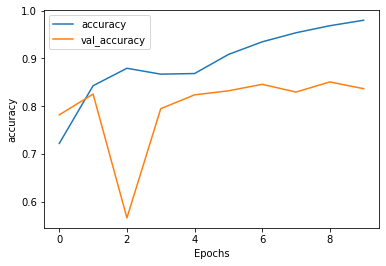

In [10]:
plot_graphs(history, 'accuracy')

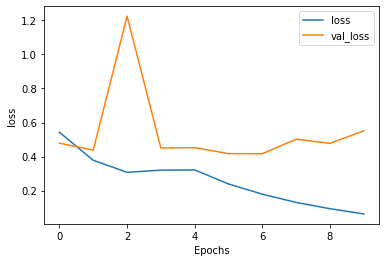

In [11]:
plot_graphs(history, 'loss')